In [2]:
import os
import numpy as np
import pandas as pd
import regex as re

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
full_UVA_schedule = pd.read_csv("/content/drive/MyDrive/Capstone Project/Basketball Data/ACC/UVA2020_2021.csv")

In [6]:
heights = pd.read_csv("/content/drive/MyDrive/4th Year/Capstone Project/Basketball Data/height21.csv")

FileNotFoundError: ignored

## Creation of the main table

In [ ]:
heights

,Season,TeamName,Size,SizeRank,Hgt5,Hgt5Rank,Hgt4,Hgt4Rank,Hgt3,Hgt3Rank,Hgt2,Hgt2Rank,Hgt1,Hgt1Rank,HgtEff,HgtEffRank,Exp,ExpRank,Bench,BenchRank,Pts5,Pts5Rank,Pts4,Pts4Rank,Pts3,Pts3Rank,Pts2,Pts2Rank,Pts1,Pts1Rank,OR5,OR5Rank,OR4,OR4Rank,OR3,OR3Rank,OR2,OR2Rank,OR1,OR1Rank,DR5,DR5Rank,DR4,DR4Rank,DR3,DR3Rank,DR2,DR2Rank,DR1,DR1Rank
0,2021,Abilene Christian,75.10,339,0.92,67,-1.08,300,-1.95,340,-3.07,347,-3.88,342,-0.08,185,2.30,31,36.46,56,28.14,11,22.88,52,19.64,165,16.56,297,12.79,335,39.19,119,25.93,195,13.97,220,11.32,153,9.58,115,24.75,205,25.26,105,19.33,173,15.46,204,15.20,119
1,2021,Air Force,76.80,190,-1.50,319,-0.32,212,0.05,180,-0.11,200,1.31,73,-0.91,298,1.89,131,27.96,255,20.86,142,17.07,261,20.99,124,13.81,334,27.23,22,30.43,263,15.80,321,18.12,138,22.35,13,13.26,34,24.16,221,20.41,274,17.15,257,20.98,36,17.26,54
2,2021,Akron,75.52,327,-1.47,316,0.16,142,0.18,144,-1.57,308,-4.24,345,-0.66,267,1.90,128,33.63,110,17.72,246,14.78,315,18.21,221,18.17,230,31.10,4,24.03,328,27.98,159,27.71,15,10.49,171,9.76,107,22.67,269,30.93,13,24.43,28,10.68,340,11.27,297
3,2021,Alabama,77.69,65,-0.02,157,0.53,93,1.00,54,1.24,47,1.14,98,0.26,123,1.88,140,32.95,124,15.97,296,20.05,148,17.54,243,21.39,118,24.99,57,25.44,316,37.39,33,17.47,151,10.97,159,8.65,141,23.31,257,23.97,147,20.81,124,19.21,72,12.63,245
4,2021,Alabama A&M,76.44,242,0.46,109,0.06,173,-0.45,236,-1.92,323,-0.54,229,0.26,121,0.72,347,34.73,85,13.24,338,31.07,3,14.44,323,17.82,246,23.41,87,28.19,288,38.19,26,15.17,194,8.00,256,10.39,94,25.03,194,22.51,217,23.25,49,14.91,226,14.26,161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,2021,Wright St.,77.38,106,-0.37,205,0.06,175,1.13,37,1.68,33,-0.16,190,-0.16,197,1.34,287,20.19,335,27.54,17,21.25,102,20.52,141,16.64,294,14.00,326,33.81,211,30.21,112,25.22,33,7.33,279,3.38,328,27.64,111,27.82,40,20.40,134,13.54,283,10.55,315
353,2021,Wyoming,77.85,51,0.32,124,0.31,119,0.80,79,1.53,36,1.73,39,0.32,113,1.01,333,30.87,170,18.57,220,17.76,239,20.65,136,18.86,207,24.15,68,28.03,291,29.55,128,31.54,5,6.55,300,4.31,310,25.39,178,25.02,116,20.26,139,16.44,158,12.86,239
354,2021,Xavier,77.23,128,-0.29,193,0.28,127,-0.48,242,0.93,70,1.16,95,-0.01,171,1.77,179,32.06,146,26.22,28,13.20,336,18.15,223,22.12,100,20.21,174,34.74,192,33.42,69,14.31,217,10.33,176,7.08,207,34.40,13,20.20,279,14.56,317,16.21,170,14.53,145
355,2021,Yale,0.00,348,-99.00,348,-99.00,348,-99.00,348,-99.00,348,-99.00,348,0.00,160,0.00,348,0.00,348,0.00,348,0.00,348,0.00,348,0.00,348,0.00,348,0.00,348,0.00,348,0.00,348,0.00,348,0.00,348,0.00,348,0.00,348,0.00,348,0.00,348,0.00,348


In [ ]:
miscDef = pd.read_csv("/content/drive/MyDrive/4th Year/Capstone Project/Basketball Data/misc21Defense.csv")

In [ ]:
miscDef

,Season,TeamName,FG2Pct,RankFG2Pct,FG3Pct,RankFG3Pct,FTPct,RankFTPct,BlockPct,RankBlockPct,OppFG2Pct,RankOppFG2Pct,OppFG3Pct,RankOppFG3Pct,OppFTPct,RankOppFTPct,OppBlockPct,RankOppBlockPct,FG3Rate,RankFG3Rate,OppFG3Rate,RankOppFG3Rate,ARate,RankARate,OppARate,RankOppARate,StlRate,RankStlRate,OppStlRate,RankOppStlRate,DFP,NSTRate,RankNSTRate,OppNSTRate,RankOppNSTRate
0,2021,Abilene Christian,49.315068,187,36.397749,56,69.484536,227,8.472554,163,46.778043,68,29.705215,12,68.821293,66,10.537408,290,35.964912,218,34.480063,85,66.465257,2,49.904398,131,0.129079,5,0.097514,238,NaN,9.413157,141,13.584257,2
1,2021,Air Force,54.121306,32,33.017078,205,69.252078,231,7.958922,197,59.050064,344,36.603774,305,68.837209,67,8.242613,142,45.042735,27,40.488923,276,59.003831,28,56.269113,281,0.110773,37,0.093875,202,NaN,13.205141,342,10.701797,83
2,2021,Akron,52.700730,62,33.389831,180,75.447570,47,9.111880,133,49.250288,146,31.590909,59,71.988796,226,7.445255,69,46.274510,19,33.664881,65,48.207885,254,46.113074,58,0.066682,320,0.080827,77,NaN,8.958340,105,9.766612,158
3,2021,Alabama,50.704225,125,35.187058,101,70.751634,190,10.600445,74,46.849518,71,29.119318,10,68.888889,69,14.172535,344,46.541176,18,34.291281,79,50.216450,210,43.966547,25,0.113453,23,0.105755,301,NaN,8.022772,37,9.157305,235
4,2021,Alabama A&M,45.517241,311,28.819444,336,62.681159,337,9.090909,135,44.781145,16,28.282828,3,67.267267,27,6.896552,34,33.179724,276,33.333333,53,47.550432,264,53.714286,218,0.076805,281,0.113334,328,NaN,10.115793,207,10.303123,113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,2021,Wright St.,53.799392,40,36.983471,42,72.440945,125,8.446602,167,44.757282,14,30.555556,28,70.059880,129,5.167173,1,32.902787,282,32.855280,42,51.971831,165,44.227642,27,0.081587,243,0.098824,253,NaN,8.216148,51,8.503426,292
353,2021,Wyoming,53.929539,38,35.653409,78,71.905697,141,5.394605,325,54.445554,313,33.037694,128,71.341463,194,10.975610,314,48.821082,9,31.060606,18,54.083205,107,45.533141,50,0.082072,240,0.079242,66,NaN,8.037414,39,9.961865,139
354,2021,Xavier,54.256671,30,32.530120,229,69.369369,228,10.340633,82,45.742092,30,33.811475,171,73.701299,290,7.369759,65,38.754864,148,37.251908,170,62.648557,9,56.931608,291,0.098123,112,0.078498,59,NaN,8.120522,46,6.564089,345
355,2021,Yale,0.000000,348,0.000000,348,0.000000,348,0.000000,348,100.000000,348,100.000000,348,100.000000,348,100.000000,348,0.000000,348,100.000000,348,0.000000,348,100.000000,348,0.000000,348,1.000000,348,NaN,100.000000,348,0.000000,348


In [ ]:
miscOff = pd.read_csv("/content/drive/MyDrive/4th Year/Capstone Project/Basketball Data/misc21Offense.csv")

In [ ]:
miscOff=miscOff.add_prefix("Offensive_")
miscOff= miscOff.rename(columns={"Offensive_Season":"Season", "Offensive_TeamName":"TeamName"})
miscOff

,Season,TeamName,Offensive_FG2Pct,Offensive_RankFG2Pct,Offensive_FG3Pct,Offensive_RankFG3Pct,Offensive_FTPct,Offensive_RankFTPct,Offensive_BlockPct,Offensive_RankBlockPct,Offensive_OppFG2Pct,Offensive_RankOppFG2Pct,Offensive_OppFG3Pct,Offensive_RankOppFG3Pct,Offensive_OppFTPct,Offensive_RankOppFTPct,Offensive_OppBlockPct,Offensive_RankOppBlockPct,Offensive_FG3Rate,Offensive_RankFG3Rate,Offensive_OppFG3Rate,Offensive_RankOppFG3Rate,Offensive_ARate,Offensive_RankARate,Offensive_OppARate,Offensive_RankOppARate,Offensive_StlRate,Offensive_RankStlRate,Offensive_OppStlRate,Offensive_RankOppStlRate,Offensive_DFP,Offensive_NSTRate,Offensive_RankNSTRate,Offensive_OppNSTRate,Offensive_RankOppNSTRate
0,2021,Abilene Christian,49.315068,187,36.397749,56,69.484536,227,8.472554,163,46.778043,68,29.705215,12,68.821293,66,10.537408,290,35.964912,218,34.480063,85,66.465257,2,49.904398,131,0.129079,5,0.097514,238,NaN,9.413157,141,13.584257,2
1,2021,Air Force,54.121306,32,33.017078,205,69.252078,231,7.958922,197,59.050064,344,36.603774,305,68.837209,67,8.242613,142,45.042735,27,40.488923,276,59.003831,28,56.269113,281,0.110773,37,0.093875,202,NaN,13.205141,342,10.701797,83
2,2021,Akron,52.700730,62,33.389831,180,75.447570,47,9.111880,133,49.250288,146,31.590909,59,71.988796,226,7.445255,69,46.274510,19,33.664881,65,48.207885,254,46.113074,58,0.066682,320,0.080827,77,NaN,8.958340,105,9.766612,158
3,2021,Alabama,50.704225,125,35.187058,101,70.751634,190,10.600445,74,46.849518,71,29.119318,10,68.888889,69,14.172535,344,46.541176,18,34.291281,79,50.216450,210,43.966547,25,0.113453,23,0.105755,301,NaN,8.022772,37,9.157305,235
4,2021,Alabama A&M,45.517241,311,28.819444,336,62.681159,337,9.090909,135,44.781145,16,28.282828,3,67.267267,27,6.896552,34,33.179724,276,33.333333,53,47.550432,264,53.714286,218,0.076805,281,0.113334,328,NaN,10.115793,207,10.303123,113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,2021,Wright St.,53.799392,40,36.983471,42,72.440945,125,8.446602,167,44.757282,14,30.555556,28,70.059880,129,5.167173,1,32.902787,282,32.855280,42,51.971831,165,44.227642,27,0.081587,243,0.098824,253,NaN,8.216148,51,8.503426,292
353,2021,Wyoming,53.929539,38,35.653409,78,71.905697,141,5.394605,325,54.445554,313,33.037694,128,71.341463,194,10.975610,314,48.821082,9,31.060606,18,54.083205,107,45.533141,50,0.082072,240,0.079242,66,NaN,8.037414,39,9.961865,139
354,2021,Xavier,54.256671,30,32.530120,229,69.369369,228,10.340633,82,45.742092,30,33.811475,171,73.701299,290,7.369759,65,38.754864,148,37.251908,170,62.648557,9,56.931608,291,0.098123,112,0.078498,59,NaN,8.120522,46,6.564089,345
355,2021,Yale,0.000000,348,0.000000,348,0.000000,348,0.000000,348,100.000000,348,100.000000,348,100.000000,348,100.000000,348,0.000000,348,100.000000,348,0.000000,348,100.000000,348,0.000000,348,1.000000,348,NaN,100.000000,348,0.000000,348


In [ ]:
miscDef = miscDef.add_prefix("Defensive_")
miscDef = miscDef.rename(columns={"Defensive_Season":"Season","Defensive_TeamName":"TeamName"})
miscDef

,Season,TeamName,Defensive_FG2Pct,Defensive_RankFG2Pct,Defensive_FG3Pct,Defensive_RankFG3Pct,Defensive_FTPct,Defensive_RankFTPct,Defensive_BlockPct,Defensive_RankBlockPct,Defensive_OppFG2Pct,Defensive_RankOppFG2Pct,Defensive_OppFG3Pct,Defensive_RankOppFG3Pct,Defensive_OppFTPct,Defensive_RankOppFTPct,Defensive_OppBlockPct,Defensive_RankOppBlockPct,Defensive_FG3Rate,Defensive_RankFG3Rate,Defensive_OppFG3Rate,Defensive_RankOppFG3Rate,Defensive_ARate,Defensive_RankARate,Defensive_OppARate,Defensive_RankOppARate,Defensive_StlRate,Defensive_RankStlRate,Defensive_OppStlRate,Defensive_RankOppStlRate,Defensive_DFP,Defensive_NSTRate,Defensive_RankNSTRate,Defensive_OppNSTRate,Defensive_RankOppNSTRate
0,2021,Abilene Christian,49.315068,187,36.397749,56,69.484536,227,8.472554,163,46.778043,68,29.705215,12,68.821293,66,10.537408,290,35.964912,218,34.480063,85,66.465257,2,49.904398,131,0.129079,5,0.097514,238,NaN,9.413157,141,13.584257,2
1,2021,Air Force,54.121306,32,33.017078,205,69.252078,231,7.958922,197,59.050064,344,36.603774,305,68.837209,67,8.242613,142,45.042735,27,40.488923,276,59.003831,28,56.269113,281,0.110773,37,0.093875,202,NaN,13.205141,342,10.701797,83
2,2021,Akron,52.700730,62,33.389831,180,75.447570,47,9.111880,133,49.250288,146,31.590909,59,71.988796,226,7.445255,69,46.274510,19,33.664881,65,48.207885,254,46.113074,58,0.066682,320,0.080827,77,NaN,8.958340,105,9.766612,158
3,2021,Alabama,50.704225,125,35.187058,101,70.751634,190,10.600445,74,46.849518,71,29.119318,10,68.888889,69,14.172535,344,46.541176,18,34.291281,79,50.216450,210,43.966547,25,0.113453,23,0.105755,301,NaN,8.022772,37,9.157305,235
4,2021,Alabama A&M,45.517241,311,28.819444,336,62.681159,337,9.090909,135,44.781145,16,28.282828,3,67.267267,27,6.896552,34,33.179724,276,33.333333,53,47.550432,264,53.714286,218,0.076805,281,0.113334,328,NaN,10.115793,207,10.303123,113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,2021,Wright St.,53.799392,40,36.983471,42,72.440945,125,8.446602,167,44.757282,14,30.555556,28,70.059880,129,5.167173,1,32.902787,282,32.855280,42,51.971831,165,44.227642,27,0.081587,243,0.098824,253,NaN,8.216148,51,8.503426,292
353,2021,Wyoming,53.929539,38,35.653409,78,71.905697,141,5.394605,325,54.445554,313,33.037694,128,71.341463,194,10.975610,314,48.821082,9,31.060606,18,54.083205,107,45.533141,50,0.082072,240,0.079242,66,NaN,8.037414,39,9.961865,139
354,2021,Xavier,54.256671,30,32.530120,229,69.369369,228,10.340633,82,45.742092,30,33.811475,171,73.701299,290,7.369759,65,38.754864,148,37.251908,170,62.648557,9,56.931608,291,0.098123,112,0.078498,59,NaN,8.120522,46,6.564089,345
355,2021,Yale,0.000000,348,0.000000,348,0.000000,348,0.000000,348,100.000000,348,100.000000,348,100.000000,348,100.000000,348,0.000000,348,100.000000,348,0.000000,348,100.000000,348,0.000000,348,1.000000,348,NaN,100.000000,348,0.000000,348


In [ ]:
final_data_frame = pd.concat([miscOff,miscDef,heights],axis=1)

In [ ]:
final_data_frame

,Season,TeamName,Offensive_FG2Pct,Offensive_RankFG2Pct,Offensive_FG3Pct,Offensive_RankFG3Pct,Offensive_FTPct,Offensive_RankFTPct,Offensive_BlockPct,Offensive_RankBlockPct,Offensive_OppFG2Pct,Offensive_RankOppFG2Pct,Offensive_OppFG3Pct,Offensive_RankOppFG3Pct,Offensive_OppFTPct,Offensive_RankOppFTPct,Offensive_OppBlockPct,Offensive_RankOppBlockPct,Offensive_FG3Rate,Offensive_RankFG3Rate,Offensive_OppFG3Rate,Offensive_RankOppFG3Rate,Offensive_ARate,Offensive_RankARate,Offensive_OppARate,Offensive_RankOppARate,Offensive_StlRate,Offensive_RankStlRate,Offensive_OppStlRate,Offensive_RankOppStlRate,Offensive_DFP,Offensive_NSTRate,Offensive_RankNSTRate,Offensive_OppNSTRate,Offensive_RankOppNSTRate,Season,TeamName,Defensive_FG2Pct,Defensive_RankFG2Pct,Defensive_FG3Pct,...,Hgt2,Hgt2Rank,Hgt1,Hgt1Rank,HgtEff,HgtEffRank,Exp,ExpRank,Bench,BenchRank,Pts5,Pts5Rank,Pts4,Pts4Rank,Pts3,Pts3Rank,Pts2,Pts2Rank,Pts1,Pts1Rank,OR5,OR5Rank,OR4,OR4Rank,OR3,OR3Rank,OR2,OR2Rank,OR1,OR1Rank,DR5,DR5Rank,DR4,DR4Rank,DR3,DR3Rank,DR2,DR2Rank,DR1,DR1Rank
0,2021,Abilene Christian,49.315068,187,36.397749,56,69.484536,227,8.472554,163,46.778043,68,29.705215,12,68.821293,66,10.537408,290,35.964912,218,34.480063,85,66.465257,2,49.904398,131,0.129079,5,0.097514,238,NaN,9.413157,141,13.584257,2,2021,Abilene Christian,49.315068,187,36.397749,...,-3.07,347,-3.88,342,-0.08,185,2.30,31,36.46,56,28.14,11,22.88,52,19.64,165,16.56,297,12.79,335,39.19,119,25.93,195,13.97,220,11.32,153,9.58,115,24.75,205,25.26,105,19.33,173,15.46,204,15.20,119
1,2021,Air Force,54.121306,32,33.017078,205,69.252078,231,7.958922,197,59.050064,344,36.603774,305,68.837209,67,8.242613,142,45.042735,27,40.488923,276,59.003831,28,56.269113,281,0.110773,37,0.093875,202,NaN,13.205141,342,10.701797,83,2021,Air Force,54.121306,32,33.017078,...,-0.11,200,1.31,73,-0.91,298,1.89,131,27.96,255,20.86,142,17.07,261,20.99,124,13.81,334,27.23,22,30.43,263,15.80,321,18.12,138,22.35,13,13.26,34,24.16,221,20.41,274,17.15,257,20.98,36,17.26,54
2,2021,Akron,52.700730,62,33.389831,180,75.447570,47,9.111880,133,49.250288,146,31.590909,59,71.988796,226,7.445255,69,46.274510,19,33.664881,65,48.207885,254,46.113074,58,0.066682,320,0.080827,77,NaN,8.958340,105,9.766612,158,2021,Akron,52.700730,62,33.389831,...,-1.57,308,-4.24,345,-0.66,267,1.90,128,33.63,110,17.72,246,14.78,315,18.21,221,18.17,230,31.10,4,24.03,328,27.98,159,27.71,15,10.49,171,9.76,107,22.67,269,30.93,13,24.43,28,10.68,340,11.27,297
3,2021,Alabama,50.704225,125,35.187058,101,70.751634,190,10.600445,74,46.849518,71,29.119318,10,68.888889,69,14.172535,344,46.541176,18,34.291281,79,50.216450,210,43.966547,25,0.113453,23,0.105755,301,NaN,8.022772,37,9.157305,235,2021,Alabama,50.704225,125,35.187058,...,1.24,47,1.14,98,0.26,123,1.88,140,32.95,124,15.97,296,20.05,148,17.54,243,21.39,118,24.99,57,25.44,316,37.39,33,17.47,151,10.97,159,8.65,141,23.31,257,23.97,147,20.81,124,19.21,72,12.63,245
4,2021,Alabama A&M,45.517241,311,28.819444,336,62.681159,337,9.090909,135,44.781145,16,28.282828,3,67.267267,27,6.896552,34,33.179724,276,33.333333,53,47.550432,264,53.714286,218,0.076805,281,0.113334,328,NaN,10.115793,207,10.303123,113,2021,Alabama A&M,45.517241,311,28.819444,...,-1.92,323,-0.54,229,0.26,121,0.72,347,34.73,85,13.24,338,31.07,3,14.44,323,17.82,246,23.41,87,28.19,288,38.19,26,15.17,194,8.00,256,10.39,94,25.03,194,22.51,217,23.25,49,14.91,226,14.26,161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,2021,Wright St.,53.799392,40,36.983471,42,72.440945,125,8.446602,167,44.757282,14,30.555556,28,70.059880,129,5.167173,1,32.902787,282,32.855280,42,51.971831,165,44.227642,27,0.081587,243,0.098824,253,NaN,8.216148,51,8.503426,292,2021,Wright St.,53.799392,40,36.983471,...,1.68,33,-0.16,1

In [1]:
final_data_frame = final_data_frame.loc[:,~final_data_frame.columns.duplicated()]

NameError: ignored

In [ ]:
final_data_frame

,Season,TeamName,Offensive_FG2Pct,Offensive_RankFG2Pct,Offensive_FG3Pct,Offensive_RankFG3Pct,Offensive_FTPct,Offensive_RankFTPct,Offensive_BlockPct,Offensive_RankBlockPct,Offensive_OppFG2Pct,Offensive_RankOppFG2Pct,Offensive_OppFG3Pct,Offensive_RankOppFG3Pct,Offensive_OppFTPct,Offensive_RankOppFTPct,Offensive_OppBlockPct,Offensive_RankOppBlockPct,Offensive_FG3Rate,Offensive_RankFG3Rate,Offensive_OppFG3Rate,Offensive_RankOppFG3Rate,Offensive_ARate,Offensive_RankARate,Offensive_OppARate,Offensive_RankOppARate,Offensive_StlRate,Offensive_RankStlRate,Offensive_OppStlRate,Offensive_RankOppStlRate,Offensive_DFP,Offensive_NSTRate,Offensive_RankNSTRate,Offensive_OppNSTRate,Offensive_RankOppNSTRate,Defensive_FG2Pct,Defensive_RankFG2Pct,Defensive_FG3Pct,Defensive_RankFG3Pct,Defensive_FTPct,...,Hgt2,Hgt2Rank,Hgt1,Hgt1Rank,HgtEff,HgtEffRank,Exp,ExpRank,Bench,BenchRank,Pts5,Pts5Rank,Pts4,Pts4Rank,Pts3,Pts3Rank,Pts2,Pts2Rank,Pts1,Pts1Rank,OR5,OR5Rank,OR4,OR4Rank,OR3,OR3Rank,OR2,OR2Rank,OR1,OR1Rank,DR5,DR5Rank,DR4,DR4Rank,DR3,DR3Rank,DR2,DR2Rank,DR1,DR1Rank
0,2021,Abilene Christian,49.315068,187,36.397749,56,69.484536,227,8.472554,163,46.778043,68,29.705215,12,68.821293,66,10.537408,290,35.964912,218,34.480063,85,66.465257,2,49.904398,131,0.129079,5,0.097514,238,NaN,9.413157,141,13.584257,2,49.315068,187,36.397749,56,69.484536,...,-3.07,347,-3.88,342,-0.08,185,2.30,31,36.46,56,28.14,11,22.88,52,19.64,165,16.56,297,12.79,335,39.19,119,25.93,195,13.97,220,11.32,153,9.58,115,24.75,205,25.26,105,19.33,173,15.46,204,15.20,119
1,2021,Air Force,54.121306,32,33.017078,205,69.252078,231,7.958922,197,59.050064,344,36.603774,305,68.837209,67,8.242613,142,45.042735,27,40.488923,276,59.003831,28,56.269113,281,0.110773,37,0.093875,202,NaN,13.205141,342,10.701797,83,54.121306,32,33.017078,205,69.252078,...,-0.11,200,1.31,73,-0.91,298,1.89,131,27.96,255,20.86,142,17.07,261,20.99,124,13.81,334,27.23,22,30.43,263,15.80,321,18.12,138,22.35,13,13.26,34,24.16,221,20.41,274,17.15,257,20.98,36,17.26,54
2,2021,Akron,52.700730,62,33.389831,180,75.447570,47,9.111880,133,49.250288,146,31.590909,59,71.988796,226,7.445255,69,46.274510,19,33.664881,65,48.207885,254,46.113074,58,0.066682,320,0.080827,77,NaN,8.958340,105,9.766612,158,52.700730,62,33.389831,180,75.447570,...,-1.57,308,-4.24,345,-0.66,267,1.90,128,33.63,110,17.72,246,14.78,315,18.21,221,18.17,230,31.10,4,24.03,328,27.98,159,27.71,15,10.49,171,9.76,107,22.67,269,30.93,13,24.43,28,10.68,340,11.27,297
3,2021,Alabama,50.704225,125,35.187058,101,70.751634,190,10.600445,74,46.849518,71,29.119318,10,68.888889,69,14.172535,344,46.541176,18,34.291281,79,50.216450,210,43.966547,25,0.113453,23,0.105755,301,NaN,8.022772,37,9.157305,235,50.704225,125,35.187058,101,70.751634,...,1.24,47,1.14,98,0.26,123,1.88,140,32.95,124,15.97,296,20.05,148,17.54,243,21.39,118,24.99,57,25.44,316,37.39,33,17.47,151,10.97,159,8.65,141,23.31,257,23.97,147,20.81,124,19.21,72,12.63,245
4,2021,Alabama A&M,45.517241,311,28.819444,336,62.681159,337,9.090909,135,44.781145,16,28.282828,3,67.267267,27,6.896552,34,33.179724,276,33.333333,53,47.550432,264,53.714286,218,0.076805,281,0.113334,328,NaN,10.115793,207,10.303123,113,45.517241,311,28.819444,336,62.681159,...,-1.92,323,-0.54,229,0.26,121,0.72,347,34.73,85,13.24,338,31.07,3,14.44,323,17.82,246,23.41,87,28.19,288,38.19,26,15.17,194,8.00,256,10.39,94,25.03,194,22.51,217,23.25,49,14.91,226,14.26,161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,2021,Wright St.,53.799392,40,36.983471,42,72.440945,125,8.446602,167,44.757282,14,30.555556,28,70.059880,129,5.167173,1,32.902787,282,32.855280,42,51.971831,165,44.227642,27,0.081587,243,0.098824,253,NaN,8.216148,51,8.503426,292,53.799392,40,36.983471,42,72.440945,...,1.68,33

## Table

In [ ]:
UNC_2020_2021_basic = pd.read_csv("/content/drive/MyDrive/4th Year/Capstone Project/Basketball Data/UNC2020_2021.csv")
Duke_2020_2021_basic = pd.read_csv("/content/drive/MyDrive/4th Year/Capstone Project/Basketball Data/Duke2020_2021.csv")
UVA_2020_2021_basic = pd.read_csv("/content/drive/MyDrive/4th Year/Capstone Project/Basketball Data/UVA2020_2021.csv")
NCState_2020_2021_basic = pd.read_csv("/content/drive/MyDrive/4th Year/Capstone Project/Basketball Data/Duke2020_2021.csv")
BostonCollege_2020_2021_basic = pd.read_csv("/content/drive/MyDrive/4th Year/Capstone Project/Basketball Data/BostonCollege2020_2021.csv")
Clemson2020_2021_basic = pd.read_csv("/content/drive/MyDrive/4th Year/Capstone Project/Basketball Data/Clemson2020_2021.csv")
FloridaState2020_2021_basic = pd.read_csv("/content/drive/MyDrive/4th Year/Capstone Project/Basketball Data/FloridaState2020_2021.csv")
GeorgiaTech2020_2021_basic = pd.read_csv("/content/drive/MyDrive/4th Year/Capstone Project/Basketball Data/GeorgiaTech2020_2021.csv")
Louisville2020_2021_basic = pd.read_csv("/content/drive/MyDrive/4th Year/Capstone Project/Basketball Data/Louisville2020_2021.csv")
Miami2020_2021_basic = pd.read_csv("/content/drive/MyDrive/4th Year/Capstone Project/Basketball Data/Miami2020_2021.csv")
Pittsburgh2020_2021_basic = pd.read_csv("/content/drive/MyDrive/4th Year/Capstone Project/Basketball Data/Pittsburgh2020_2021.csv")
Syracuse2020_2021_basic = pd.read_csv("/content/drive/MyDrive/4th Year/Capstone Project/Basketball Data/Syracuse2020_2021.csv")
WakeForest2020_2021_basic = pd.read_csv("/content/drive/MyDrive/4th Year/Capstone Project/Basketball Data/WakeForest2020_2021.csv")
VirginiaTech2020_2021_basic = pd.read_csv("/content/drive/MyDrive/4th Year/Capstone Project/Basketball Data/VirginiaTech2020_2021.csv")

In [ ]:
offensive_four_factors_2020_2021 = pd.read_csv("/content/drive/MyDrive/4th Year/Capstone Project/Basketball Data/offense21.csv")
defensive_four_factors_2020_2021 = pd.read_csv("/content/drive/MyDrive/4th Year/Capstone Project/Basketball Data/defense21.csv")

In [ ]:
def clean_opponent_name(dataframe):
  clean_opponent_list = []
  pattern = r"[(\d)]"
  for team in dataframe.index:
    clean_opponent = re.sub(pattern,"",dataframe["Opponent"][team])
    clean_opponent = clean_opponent.replace("()","")
    if clean_opponent == "North Carolina State":
      clean_opponent = "N.C. State"
    if clean_opponent =="Florida State" or clean_opponent == "Florida State ":
      clean_opponent ="Florida St."
    
    clean_opponent = clean_opponent.strip()
    clean_opponent_list.append(clean_opponent)
  dataframe["Official Opponent"] = clean_opponent_list
  dataframe = dataframe.drop(columns=["Opponent"],axis=1)
  return dataframe


In [ ]:
clean_opponent_name(full_UVA_schedule)

,G,Date,Time,Type,Unnamed: 4,Conf,Result,Tm,Opp,OT,W,L,Streak,Arena,Official Opponent
0,1,"Wed, Nov 25, 2020",1:30p,REG,N,CAA,W,89,54,NaN,1,0,W 1,Mohegan Sun Arena,Towson
1,2,"Fri, Nov 27, 2020",11:30a,REG,N,WCC,L,60,61,NaN,1,1,L 1,Mohegan Sun Arena,San Francisco
2,3,"Tue, Dec 1, 2020",4:00p,REG,NaN,NEC,W,76,51,NaN,2,1,W 1,John Paul Jones Arena,Saint Francis PA
3,4,"Fri, Dec 4, 2020",6:00p,REG,NaN,MAC,W,71,64,OT,3,1,W 2,John Paul Jones Arena,Kent State
4,5,"Tue, Dec 22, 2020",2:00p,REG,NaN,CAA,W,76,40,NaN,4,1,W 3,John Paul Jones Arena,William & Mary
5,6,"Sat, Dec 26, 2020",4:00p,REG,N,WCC,L,75,98,NaN,4,2,L 1,NaN,Gonzaga
6,7,"Wed, Dec 30, 2020",6:00p,REG,@,ACC,W,66,57,NaN,5,2,W 1,Purcell Pavilion at the Joyce Center,Notre Dame
7,8,"Wed, Jan 6, 2021",9:00p,REG,NaN,ACC,W,70,61,NaN,6,2,W 2,John Paul Jones Arena,Wake Forest
8,9,"Sat, Jan 9, 2021",2:00p,REG,@,ACC,W,61,49,NaN,7,2,W 3,Silvio O. Conte Forum,Boston College
9,10,"Wed, Jan 13, 2021",4:30p,REG,NaN,ACC,W,80,68,NaN,8,2,W 4,John Paul Jones Arena,Notre Dame


In [ ]:
UNC_2020_2021_cleaned = clean_opponent_name(UNC_2020_2021_basic)
Duke_2020_2021_cleaned = clean_opponent_name(Duke_2020_2021_basic)
UVA_2020_2021_cleaned = clean_opponent_name(UVA_2020_2021_basic)
NCState_2020_2021_cleaned = clean_opponent_name(NCState_2020_2021_basic)
BostonCollege_2020_2021_cleaned = clean_opponent_name(BostonCollege_2020_2021_basic)
Clemson_2020_2021_cleaned = clean_opponent_name(Clemson2020_2021_basic)
FloridaState_2020_2021_cleaned = clean_opponent_name(FloridaState2020_2021_basic)
GeorgiaTech_2020_2021_cleaned = clean_opponent_name(GeorgiaTech2020_2021_basic)
Louisville_2020_2021_cleaned = clean_opponent_name(Louisville2020_2021_basic)
Miami_2020_2021_cleaned = clean_opponent_name(Miami2020_2021_basic)
Pittsburgh_2020_2021_cleaned = clean_opponent_name(Pittsburgh2020_2021_basic)
Syracuse_2020_2021_cleaned = clean_opponent_name(Syracuse2020_2021_basic)
WakeForest_2020_2021_cleaned = clean_opponent_name(WakeForest2020_2021_basic)
VirginiaTech_2020_2021_cleaned = clean_opponent_name(VirginiaTech2020_2021_basic)

In [ ]:
def grab_stats(offensive_factors, defensive_factors, team_name):
  offense_factors = offensive_factors[offensive_factors["TeamName"]== team_name]
  offense_factors = offense_factors.drop(["RankeFGPct","RankTOPct","RankORPct","RankFTRate","Season", "TeamName"],axis =1)
  defense_factors = defensive_factors[defensive_factors["TeamName"]== team_name]
  defense_factors = defense_factors.drop(["RankeFGPct","RankTOPct","RankORPct","RankFTRate","Season","TeamName"],axis =1)
  return offense_factors.values.tolist()[0], defense_factors.values.tolist()[0]


In [ ]:
def grab_misc_stats(dataframe, team_name):
  dataframe = dataframe[dataframe.columns.drop(list(dataframe.filter(regex='Rank')))]
  misc_stats = dataframe[dataframe["TeamName"] == team_name]
  return misc_stats[["Exp","Bench","Size"]].values.tolist()

In [ ]:
UNC_MISC = grab_misc_stats(final_data_frame,"North Carolina")
UNC_MISC

[[1.02, 34.83, 78.84]]

In [ ]:
def return_final_dataframe(dataframe,team_name):
  offense_stats, defense_stats = grab_stats(offensive_four_factors_2020_2021,defensive_four_factors_2020_2021,team_name)
  tm_misc_stats = grab_misc_stats(final_data_frame,team_name)
  new_dataframe = dataframe[["Unnamed: 4","Official Opponent","Tm","Opp"]]
  new_dataframe[["Opp Off eFG%","Opp Off TOP%","Opp Off ORB%", "Opp Off FTR%"]] = np.NaN
  new_dataframe[["Opp Def eFG%","Opp Def TOP%","Opp Def ORB%", "Opp Def FTR%"]] = np.NaN
  for index,row in new_dataframe.iterrows():
    try:
      opponent_off_fac, opponent_def_fac = grab_stats(offensive_four_factors_2020_2021, defensive_four_factors_2020_2021, row["Official Opponent"])
      opponent_misc_stats = grab_misc_stats(final_data_frame, row["Official Opponent"])
      
      final_list = opponent_off_fac + opponent_def_fac + opponent_misc_stats[0]
      new_dataframe.at[ index, "Opp Off eFG%"] = final_list[0]
      new_dataframe.at[ index, "Opp Off TOP%"] = final_list[1]
      new_dataframe.at[ index, "Opp Off ORB%"] = final_list[2]
      new_dataframe.at[ index, "Opp Off FTR%"] = final_list[3]
      new_dataframe.at[ index, "Opp Def eFG%"] = final_list[4]
      new_dataframe.at[ index, "Opp Def TOP%"] = final_list[5]
      new_dataframe.at[ index, "Opp Def ORB%"] = final_list[6]
      new_dataframe.at[ index, "Opp Def FTR%"] = final_list[7]
      new_dataframe.at[ index, "Opp Exp"] = final_list[8]
      new_dataframe.at[ index, "Opp Bench"] = final_list[9]
      new_dataframe.at[ index, "Opp Size"] = final_list[10]
    except IndexError:
      continue
  total_stats = offense_stats + defense_stats + tm_misc_stats[0]
  new_dataframe["tm Off eFG%"] = total_stats[0]
  new_dataframe["tm Off TOP%"] = total_stats[1]
  new_dataframe["tm Off ORB%"] = total_stats[2]
  new_dataframe["tm Off FTR%"] = total_stats[3]
  new_dataframe["tm Def eFG%"] = total_stats[4]
  new_dataframe["tm Def TOP%"] = total_stats[5]
  new_dataframe["tm Def ORB%"] = total_stats[6]
  new_dataframe["tm Def FTR%"] = total_stats[7]
  new_dataframe["tm Exp"] = total_stats[8]
  new_dataframe["tm Bench"] = total_stats[9]
  new_dataframe["tm Size"] = total_stats[10]
  new_dataframe["Final Point Differential"] = new_dataframe["Tm"] - new_dataframe["Opp"]
  new_dataframe = new_dataframe.drop(columns=['Unnamed: 4','Official Opponent'])
  new_dataframe = new_dataframe.dropna()
  return new_dataframe

In [ ]:
UNC_2020_2021_FINAL = return_final_dataframe(UNC_2020_2021_cleaned,"North Carolina")
Duke_2020_2021_FINAL = return_final_dataframe(Duke_2020_2021_cleaned,"Duke")
UVA_2020_2021_FINAL = return_final_dataframe(UVA_2020_2021_cleaned,"Virginia")
NCState_2020_2021_FINAL = return_final_dataframe(NCState_2020_2021_cleaned,"N.C. State")
BostonCollege_2020_2021_FINAL = return_final_dataframe(BostonCollege_2020_2021_cleaned,"Boston College")
FloridaState_2020_2021_FINAL = return_final_dataframe(FloridaState2020_2021_basic,"Florida St.")
WakeForest_2020_2021_FINAL = return_final_dataframe(WakeForest_2020_2021_cleaned,"Wake Forest")
Clemson_2020_2021_FINAL = return_final_dataframe(Clemson_2020_2021_cleaned,"Clemson")
Pittsburgh_2020_2021_FINAL = return_final_dataframe(Pittsburgh_2020_2021_cleaned,"Pittsburgh")
GeorgiaTech_2020_2021_FINAL = return_final_dataframe(GeorgiaTech_2020_2021_cleaned,"Georgia Tech")
Miami_2020_2021_FINAL = return_final_dataframe(Miami_2020_2021_cleaned,"Miami FL")
Syracuse_2020_2021_FINAL = return_final_dataframe(Syracuse_2020_2021_cleaned,"Syracuse")
VirginiaTech_2020_2021_FINAL = return_final_dataframe(VirginiaTech_2020_2021_cleaned,"Virginia Tech")
Louisville_2020_2021_FINAL = return_final_dataframe(Louisville_2020_2021_cleaned,"Louisville")

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:659: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[k] = np.nan
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

In [ ]:
pip install dataframe-image

     |████████████████████████████████| 1.1 MB 24.2 MB/s 
     |████████████████████████████████| 192 kB 46.6 MB/s 
     |████████████████████████████████| 160 kB 54.1 MB/s 
     |████████████████████████████████| 271 kB 48.9 MB/s 


In [ ]:
import dataframe_image as dfi
dfi.export(UVA_2020_2021_FINAL, 'dataframe.png')

OSError: ignored

In [ ]:
Louisville_2020_2021_FINAL

,Tm,Opp,Opp Off eFG%,Opp Off TOP%,Opp Off ORB%,Opp Off FTR%,Opp Def eFG%,Opp Def TOP%,Opp Def ORB%,Opp Def FTR%,Opp Exp,Opp Bench,Opp Size,tm Off eFG%,tm Off TOP%,tm Off ORB%,tm Off FTR%,tm Def eFG%,tm Def TOP%,tm Def ORB%,tm Def FTR%,tm Exp,tm Bench,tm Size,Final Point Differential
0,79,44,53.194765,17.317249,19.029374,25.404157,57.370518,18.328475,24.163028,34.342629,2.30,21.12,76.36,47.774869,17.23554,32.00569,32.111693,48.422436,16.633425,26.164384,29.798422,1.02,21.08,77.43,35
1,71,70,50.032787,18.859537,29.613734,35.672131,49.428934,19.182843,29.778247,27.284264,2.38,24.24,79.19,47.774869,17.23554,32.00569,32.111693,48.422436,16.633425,26.164384,29.798422,1.02,21.08,77.43,1
3,75,54,50.520196,20.453518,31.770833,35.495716,49.385965,18.868742,24.207493,22.397661,2.12,30.64,76.31,47.774869,17.23554,32.00569,32.111693,48.422436,16.633425,26.164384,29.798422,1.02,21.08,77.43,21
4,48,85,49.944598,13.640654,23.791822,26.260388,47.856315,17.343117,25.166826,28.447277,2.38,28.77,77.97,47.774869,17.23554,32.00569,32.111693,48.422436,16.633425,26.164384,29.798422,1.02,21.08,77.43,-37
5,64,54,48.829953,18.321827,34.487021,36.895476,50.000000,17.458842,26.143791,33.226581,1.27,33.54,77.63,47.774869,17.23554,32.00569,32.111693,48.422436,16.633425,26.164384,29.798422,1.02,21.08,77.43,10
6,62,59,47.086721,19.756581,32.644178,34.485095,46.679816,17.945089,30.522946,29.651545,1.00,31.72,78.95,47.774869,17.23554,32.00569,32.111693,48.422436,16.633425,26.164384,29.798422,1.02,21.08,77.43,3
7,76,64,49.789030,19.156790,25.373134,29.704641,55.463576,18.465209,28.656716,29.056291,1.76,33.86,76.95,47.774869,17.23554,32.00569,32.111693,48.422436,16.633425,26.164384,29.798422,1.02,21.08,77.43,12
8,73,71,52.258065,17.183288,27.830832,33.387097,48.842975,17.924528,24.353741,31.900826,1.55,28.51,76.42,47.774869,17.23554,32.00569,32.111693,48.422436,16.633425,26.164384,29.798422,1.02,21.08,77.43,2
9,77,65,48.975235,20.014976,26.158038,28.522630,54.451167,17.900718,25.909091,32.065687,1.70,38.13,77.51,47.774869,17.23554,32.00569,32.111693,48.422436,16.633425,26.164384,29.798422,1.02,21.08,77.43,12
10,72,78,47.375328,18.415458,27.032735,32.808399,52.546584,17.927990,26.259378,19.751553,1.80,30.00,78.61,47.774869,17.23554,32.00569,32.111693,48.422436,16.633425,26.164384,29.798422,1.02,21.08,77.43,-6


## Linear Regression Function

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
def perform_linear_regression(df):
  train_set, test_set = train_test_split(df,test_size = 0.2, random_state = 9)
  y = train_set["Final Point Differential"].copy()
  x = train_set.drop(columns="Final Point Differential")
  y_test = test_set["Final Point Differential"].copy()
  x_test = test_set.drop(columns="Final Point Differential")
  lin_reg = LinearRegression()
  lin_reg.fit(x,y)
  basketball_predictions = lin_reg.predict(x)
  lin_mse = mean_squared_error(y, basketball_predictions)
  lin_rmse = np.sqrt(lin_mse)
  return lin_rmse

In [ ]:
list_of_final_dataframes = []
list_of_final_dataframes.append(UNC_2020_2021_FINAL)
list_of_final_dataframes.append(UVA_2020_2021_FINAL)
list_of_final_dataframes.append(Duke_2020_2021_FINAL)
list_of_final_dataframes.append(Louisville_2020_2021_FINAL)
list_of_final_dataframes.append(WakeForest_2020_2021_FINAL)
list_of_final_dataframes.append(Clemson_2020_2021_FINAL)
list_of_final_dataframes.append(Pittsburgh_2020_2021_FINAL)
list_of_final_dataframes.append(Syracuse_2020_2021_FINAL)
list_of_final_dataframes.append(Clemson_2020_2021_FINAL)
list_of_final_dataframes.append(FloridaState_2020_2021_FINAL)
list_of_final_dataframes.append(Miami_2020_2021_FINAL)
list_of_final_dataframes.append(BostonCollege_2020_2021_FINAL)
list_of_final_dataframes.append(GeorgiaTech_2020_2021_FINAL)
list_of_final_dataframes.append(VirginiaTech_2020_2021_FINAL)

In [ ]:
linear_errors = []
for i in range(len(list_of_final_dataframes)):
  linear_errors.append(perform_linear_regression(list_of_final_dataframes[i]))
linear_errors

[2.279589283430436e-14,
 7.046588637282449e-15,
 1.4877670828744796e-14,
 2.4070632032453244e-14,
 2.6957166118275132e-14,
 1.485470524178117e-14,
 2.0246279852740065e-14,
 2.357878525615263e-14,
 1.485470524178117e-14,
 1.587251243997396e-14,
 2.0134531920895975e-14,
 1.5294559613193752e-14,
 1.6140672660990282e-14,
 1.0266051672260722e-14]

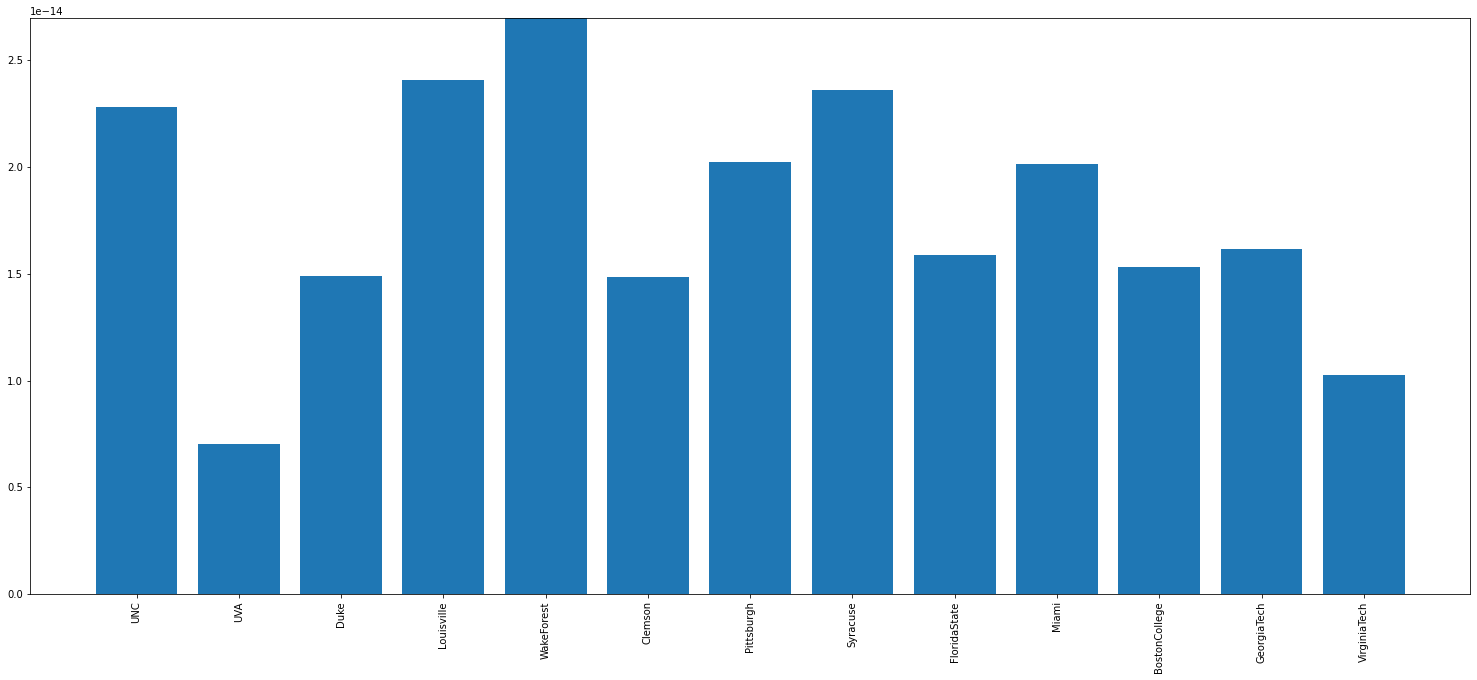

In [ ]:
import matplotlib.pyplot as plt
import math
fig = plt.figure(1, [20,8])
ax = fig.add_axes([0,0,1,1])
teams = ["UNC","UVA","Duke","Louisville","WakeForest","Clemson","Pittsburgh","Syracuse","Clemson","FloridaState","Miami","BostonCollege","GeorgiaTech","VirginiaTech"]
plt.bar(teams,linear_errors)
low = 0
high = max(linear_errors)
plt.setp(ax.get_xticklabels(), fontsize=10, rotation='vertical')
plt.ylim([0, high])
plt.show()

In [ ]:
ACC_table = pd.concat(list_of_final_dataframes)

In [ ]:
ACC_table

,Tm,Opp,Opp Off eFG%,Opp Off TOP%,Opp Off ORB%,Opp Off FTR%,Opp Def eFG%,Opp Def TOP%,Opp Def ORB%,Opp Def FTR%,Opp Exp,Opp Bench,Opp Size,tm Off eFG%,tm Off TOP%,tm Off ORB%,tm Off FTR%,tm Def eFG%,tm Def TOP%,tm Def ORB%,tm Def FTR%,tm Exp,tm Bench,tm Size,Final Point Differential
2,67,63,51.368925,21.034501,25.059952,36.481862,48.259789,20.251579,28.688525,27.035426,1.34,37.96,78.80,48.302300,20.347544,40.913160,34.173056,49.106113,19.048764,26.404494,26.874279,1.02,34.83,78.84,4
3,67,69,52.876535,20.672106,31.122995,33.872010,46.041799,17.779064,27.458617,35.908803,1.96,27.83,77.84,48.302300,20.347544,40.913160,34.173056,49.106113,19.048764,26.404494,26.874279,1.02,34.83,78.84,-2
4,80,93,54.742478,13.334165,30.803177,31.973483,48.826174,16.100777,29.099678,22.177822,1.70,30.77,77.91,48.302300,20.347544,40.913160,34.173056,49.106113,19.048764,26.404494,26.874279,1.02,34.83,78.84,-13
5,73,67,46.870654,21.392449,26.406926,34.492350,51.035912,20.838240,33.561644,38.259669,2.61,39.50,75.20,48.302300,20.347544,40.913160,34.173056,49.106113,19.048764,26.404494,26.874279,1.02,34.83,78.84,6
6,75,63,47.086721,19.756581,32.644178,34.485095,46.679816,17.945089,30.522946,29.651545,1.00,31.72,78.95,48.302300,20.347544,40.913160,34.173056,49.106113,19.048764,26.404494,26.874279,1.02,34.83,78.84,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,80,76,47.375328,18.415458,27.032735,32.808399,52.546584,17.927990,26.259378,19.751553,1.80,30.00,78.61,52.258065,17.183288,27.830832,33.387097,48.842975,17.924528,24.353741,31.900826,1.55,28.51,76.42,4
18,53,69,54.064772,16.058697,24.375743,28.420357,52.405498,22.648301,30.382775,28.865979,2.54,20.05,76.34,52.258065,17.183288,27.830832,33.387097,48.842975,17.924528,24.353741,31.900826,1.55,28.51,76.42,-16
19,84,46,48.975235,20.014976,26.158038,28.522630,54.451167,17.900718,25.909091,32.065687,1.70,38.13,77.51,52.258065,17.183288,27.830832,33.387097,48.842975,17.924528,24.353741,31.900826,1.55,28.51,76.42,38
20,73,81,48.302300,20.347544,40.913160,34.173056,49.106113,19.048764,26.404494,26.874279,1.02,34.83,78.84,52.258065,17.183288,27.830832,33.387097,48.842975,17.924528,24.353741,31.900826,1.55,28.51,76.42,-8


In [ ]:
def perform_linear_regression(df):
  train_set, test_set = train_test_split(df,test_size = 0.2, random_state = 9)
  y = train_set["Final Point Differential"].copy()
  x = train_set.drop(columns="Final Point Differential")
  y_test = test_set["Final Point Differential"].copy()
  x_test = test_set.drop(columns="Final Point Differential")
  lin_reg = LinearRegression()
  lin_reg.fit(x,y)
  basketball_predictions = lin_reg.predict(x)
  lin_mse = mean_squared_error(y, basketball_predictions)
  lin_rmse = np.sqrt(lin_mse)
  return lin_rmse, basketball_predictions, y

In [ ]:
acc_lin_rmse, acc_basketball_predictions, acc_y = perform_linear_regression(ACC_table)

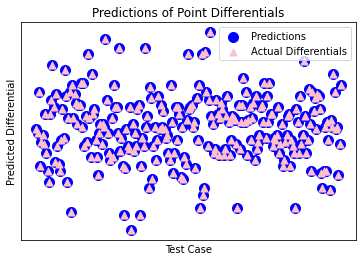

In [ ]:
import matplotlib.pyplot as plt
plt.scatter([x for x in range(len(acc_y))], acc_basketball_predictions, color="blue", marker="o", s=100)
plt.scatter([x for x in range(len(acc_y))], acc_y, color="pink", marker="^", s=50)
#plt.scatter([x for x in range(5)], basketball_predictions, color="blue", marker="o", s=100)
plt.xticks(())
plt.yticks(())
plt.xlabel("Test Case")
plt.ylabel("Predicted Differential")
plt.title("Predictions of Point Differentials")
plt.legend(['Predictions', 'Actual Differentials'])
plt.show()

## Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=2)

In [ ]:
def perform_tree(df):
  train_set, test_set = train_test_split(df,test_size = 0.2, random_state = 9)
  y = train_set["Final Point Differential"].copy()
  x = train_set.drop(columns="Final Point Differential")
  y_test = test_set["Final Point Differential"].copy()
  x_test = test_set.drop(columns="Final Point Differential")
  tree_reg.fit(x,y)
  scores = cross_val_score(tree_reg, x, y,
                         scoring="neg_mean_squared_error", cv=10)
  tree_rmse_scores = np.sqrt(-scores)
  return tree_rmse_scores

In [ ]:
from sklearn.model_selection import cross_val_score
ACC_tree = perform_tree(ACC_table)

In [ ]:
np.mean(ACC_tree[0])

5.824087911424415

In [ ]:
average_tree_rmse = []
for i in range(len(list_of_final_dataframes)):
  tree_rmse = perform_tree(list_of_final_dataframes[i])
  average_tree_rmse.append(np.mean(tree_rmse[0]))

In [ ]:
average_tree_rmse

[15.340577998671801,
 14.7648230602334,
 5.1478150704935,
 10.44030650891055,
 24.698178070456937,
 6.519202405202649,
 26.315394733881533,
 20.182500670960803,
 6.519202405202649,
 7.106335201775948,
 5.196152422706632,
 28.30194339616981,
 18.027756377319946,
 29.025850547399983]

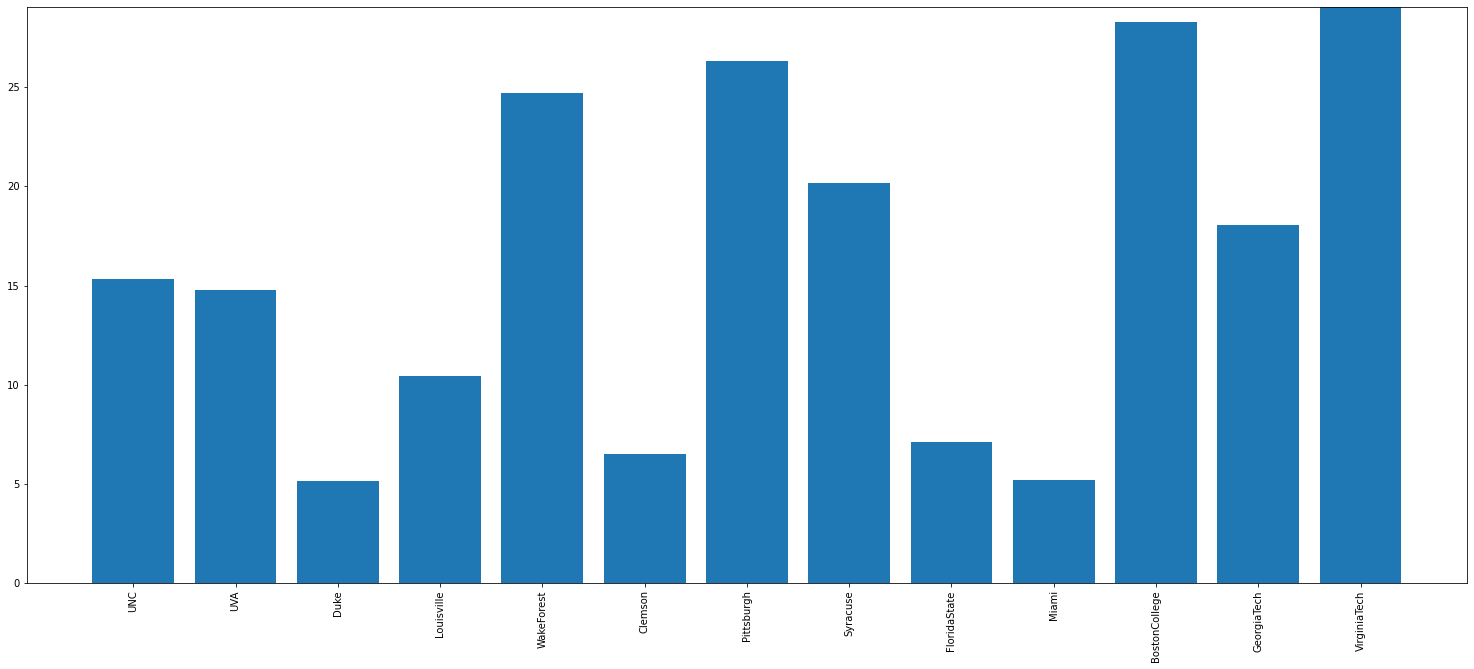

In [ ]:
import matplotlib.pyplot as plt
import math
fig = plt.figure(1, [20,8])
ax = fig.add_axes([0,0,1,1])
teams = ["UNC","UVA","Duke","Louisville","WakeForest","Clemson","Pittsburgh","Syracuse","Clemson","FloridaState","Miami","BostonCollege","GeorgiaTech","VirginiaTech"]
plt.bar(teams,average_tree_rmse)
low = 0
high = max(average_tree_rmse)
plt.setp(ax.get_xticklabels(), fontsize=10, rotation='vertical')
plt.ylim([0, high])
plt.show()

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

def perform_random_forest(df):
  train_set, test_set = train_test_split(df,test_size = 0.2, random_state = 9)
  y = train_set["Final Point Differential"].copy()
  x = train_set.drop(columns="Final Point Differential")
  y_test = test_set["Final Point Differential"].copy()
  x_test = test_set.drop(columns="Final Point Differential")
  random_forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
  random_forest_reg.fit(x,y)
  random_forest_predictions = random_forest_reg.predict(x)
  random_tree_mse = mean_squared_error(y,random_forest_predictions)
  random_tree_rmse = np.sqrt(random_tree_mse)
  return random_tree_rmse

In [ ]:
random_forest_errors = []
for i in range(len(list_of_final_dataframes)):
  random_forest_errors.append(perform_random_forest(list_of_final_dataframes[i]))
random_forest_errors

[5.166810289862458,
 4.180623956620192,
 2.475454800756466,
 4.495078049007233,
 4.121575851540282,
 4.265424949521442,
 4.045169959346579,
 5.018374808071405,
 4.265424949521442,
 3.5496213551174556,
 3.0343227062582327,
 5.048278914640118,
 3.424174677527743,
 5.422074633692654]

In [ ]:
print(np.mean(random_forest_errors))

4.179457850105979


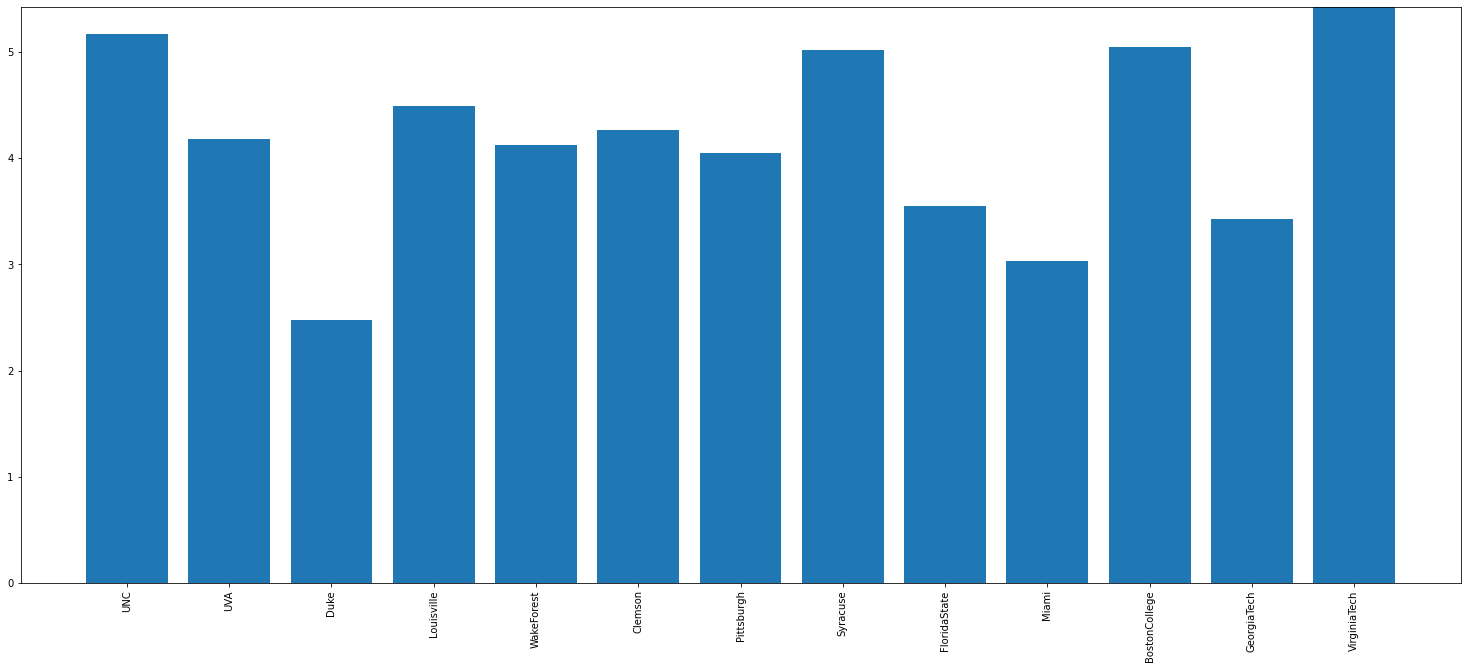

In [ ]:
import matplotlib.pyplot as plt
import math
fig = plt.figure(1, [20,8])
ax = fig.add_axes([0,0,1,1])
teams = ["UNC","UVA","Duke","Louisville","WakeForest","Clemson","Pittsburgh","Syracuse","Clemson","FloridaState","Miami","BostonCollege","GeorgiaTech","VirginiaTech"]
plt.bar(teams,random_forest_errors)
low = 0
high = max(random_forest_errors)
plt.setp(ax.get_xticklabels(), fontsize=10, rotation='vertical')
plt.ylim([0, high])
plt.show()

## Logistic Regression

In [ ]:
list_log_dataframes = []
for i in range(len(list_of_final_dataframes)):
  log_dataframe = list_of_final_dataframes[i]
  log_dataframe['BinaryResult'] = np.where(log_dataframe['Final Point Differential'] > 0 , 1, 0)
  list_log_dataframes.append(log_dataframe)

In [ ]:
from  sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
def perform_log(df):
  train_set, test_set = train_test_split(df,test_size = 0.2, random_state = 9)
  y = train_set["BinaryResult"].copy()
  x = train_set.drop(columns="BinaryResult")
  log_reg = LogisticRegression(random_state=0, max_iter=1000).fit(x,y)
  log_basketball_predictions = log_reg.predict(x)
  log_mse = log_loss(y, log_basketball_predictions)
  return log_mse
  

In [ ]:
log_reg_errors = []
for i in range(len(list_log_dataframes)):
  log_reg_errors.append(perform_log(list_log_dataframes[i]))
log_reg_errors

[9.992007221626413e-16,
 9.992007221626415e-16,
 9.992007221626415e-16,
 9.992007221626413e-16,
 9.992007221626415e-16,
 9.992007221626415e-16,
 9.992007221626415e-16,
 9.992007221626413e-16,
 9.992007221626415e-16,
 9.992007221626415e-16,
 9.992007221626413e-16,
 9.992007221626413e-16,
 9.992007221626415e-16,
 9.992007221626413e-16]